# DAT 402 Project 1

For this Project, we chose to use the "Loan Approval Classification Dataset" from Kaggle. (https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data.) The goal of this project is to correctly classify if a person will be approved for a loan based on certain criteria. We also aim to predict the most important criteria for predicting the outcome of a person's loan application.

This raw dataset contains 14 unique features and 45,000 records.

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

sns.set()

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split, GridSearchCV


import matplotlib.pyplot as plt

In [3]:
labelEncoder = LabelEncoder()
ohEncoder = OneHotEncoder()

### Importing Dataset

In [4]:
url = "https://github.com/ProntoSbinalla/DAT-402-Project-1/blob/main/loan_data.csv?raw=true"

data = pd.read_csv(url)

data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [5]:
data.shape

(45000, 14)

### Data Cleaning

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [7]:
data.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

No NA Values in the dataset. This is a good indication that the dataset is already quite clean.

#### Removing Outliers

The data was relatively clean before any filtering. There were only about 50 rows of data that could be classified as outliers and had to be cleaned. Since the dataset has 45,000 rows of data, removing the outliers was the best approach to clean the dataset.

In [8]:
data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [9]:
cleaned_df = data.copy()

cleaned_df = cleaned_df[(cleaned_df['person_age'] <= 100)]
cleaned_df = cleaned_df[(cleaned_df['person_emp_exp'] <= 45)]
cleaned_df = cleaned_df[(cleaned_df['cb_person_cred_hist_length'] < cleaned_df['person_age'])]
cleaned_df = cleaned_df[(cleaned_df['person_gender'] == 'male') | (cleaned_df['person_gender'] == 'female')]
cleaned_df = cleaned_df[(cleaned_df['loan_percent_income'] > 0)]

cleaned_df.reset_index(drop = True)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44946,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44947,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44948,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44949,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [10]:
cleaned_df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,44951.000000,4.495100e+04,44951.000000,44951.000000,44951.000000,44951.000000,44951.000000,44951.000000,44951.000000
mean,27.723655,7.939670e+04,5.369625,9587.106182,11.006833,0.139817,5.856065,632.557207,0.222398
std,5.828596,5.743740e+04,5.843387,6315.393898,2.979246,0.087176,3.857791,50.370605,0.415862
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.010000,2.000000,390.000000,0.000000
25%,24.000000,4.717050e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704100e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.569650e+04,8.000000,12250.000000,13.000000,0.190000,8.000000,670.000000,0.000000
max,70.000000,2.139143e+06,45.000000,35000.000000,20.000000,0.660000,30.000000,768.000000,1.000000


In [11]:
cleaned_df.shape

(44951, 14)

#### Graphing Data

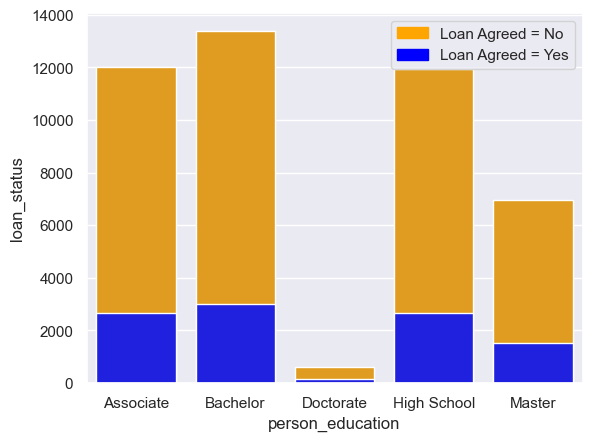

In [12]:
total = cleaned_df.groupby('person_education')['loan_status'].count().reset_index()

bar1 = sns.barplot(x="person_education",  y="loan_status", data=total, color='orange')

loan = cleaned_df[cleaned_df.loan_status == 1]

bar2 = sns.barplot(x="person_education", y="loan_status", data=loan, estimator=sum, color='blue')

top_bar = mpatches.Patch(color='orange', label='Loan Agreed = No')
bottom_bar = mpatches.Patch(color='blue', label='Loan Agreed = Yes')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()


This bar plot tells us that most loan applications are getting rejected. It also tells us that people with doctorates do not submit many loan applications.

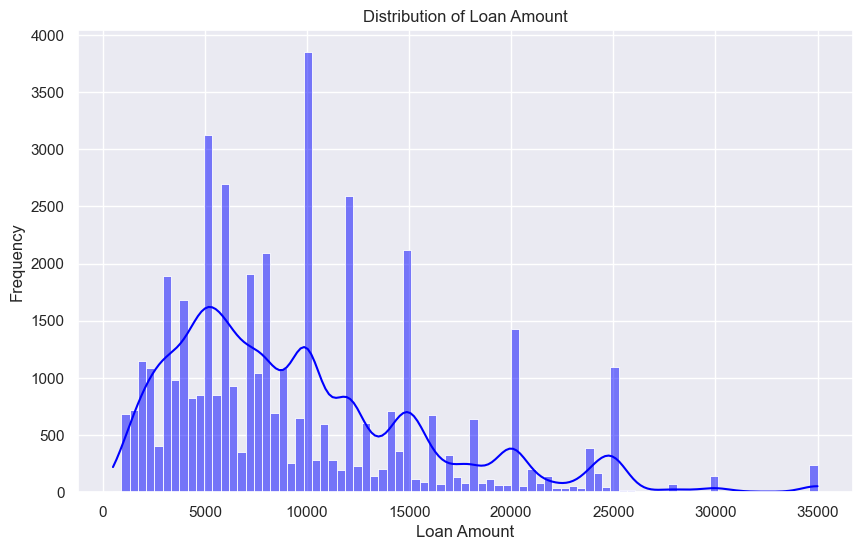

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_df['loan_amnt'], kde=True, color='blue')
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

The majority of loan amounts cluster between 0 and 15,000, indicating that smaller loan amounts are more frequently requested or approved.

Specific peaks around 5,000, 10,000, and 15,000 suggest that these might be standard loan values, possibly due to lending policies, financial needs, or common benchmarks.

Past $15000 the number of loans appplications decreases dramatically, which means that the higher the loan amount, the less likely you will submit a loan application.

C:\Users\mesha\AppData\Local\Temp\ipykernel_85524\784367557.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='person_education', y='loan_amnt', data=cleaned_df, palette='viridis')


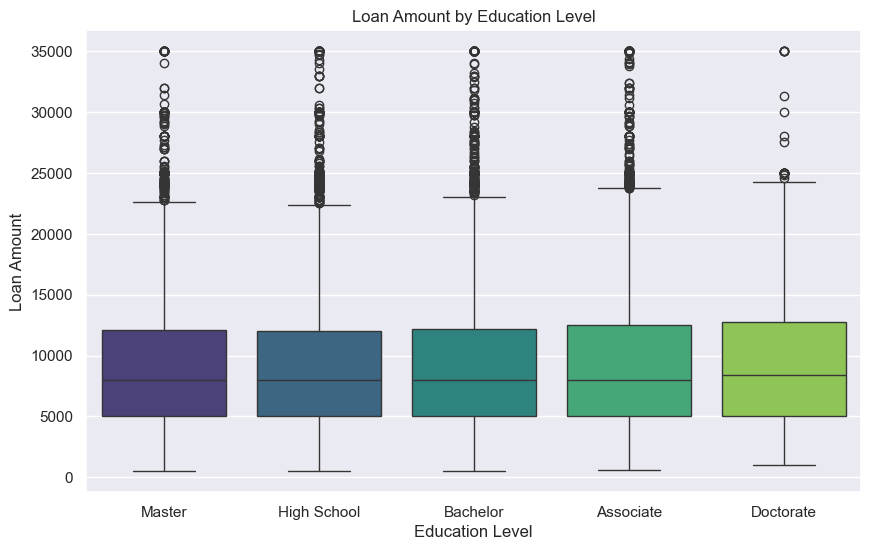

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='person_education', y='loan_amnt', data=cleaned_df, palette='viridis')
plt.title('Loan Amount by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Loan Amount')
plt.show()

The box plot shows us that there is a significant amount of outliers that need to be dealt with before making any models. This is because the outliers significantly affect the models performance. Also the whiskers are distributed evenly among all the categories suggesting that the loan amounts are relatively unform for all groups. This might mean that the loan amount is not tied significantly to education level but rather to other characteristics.

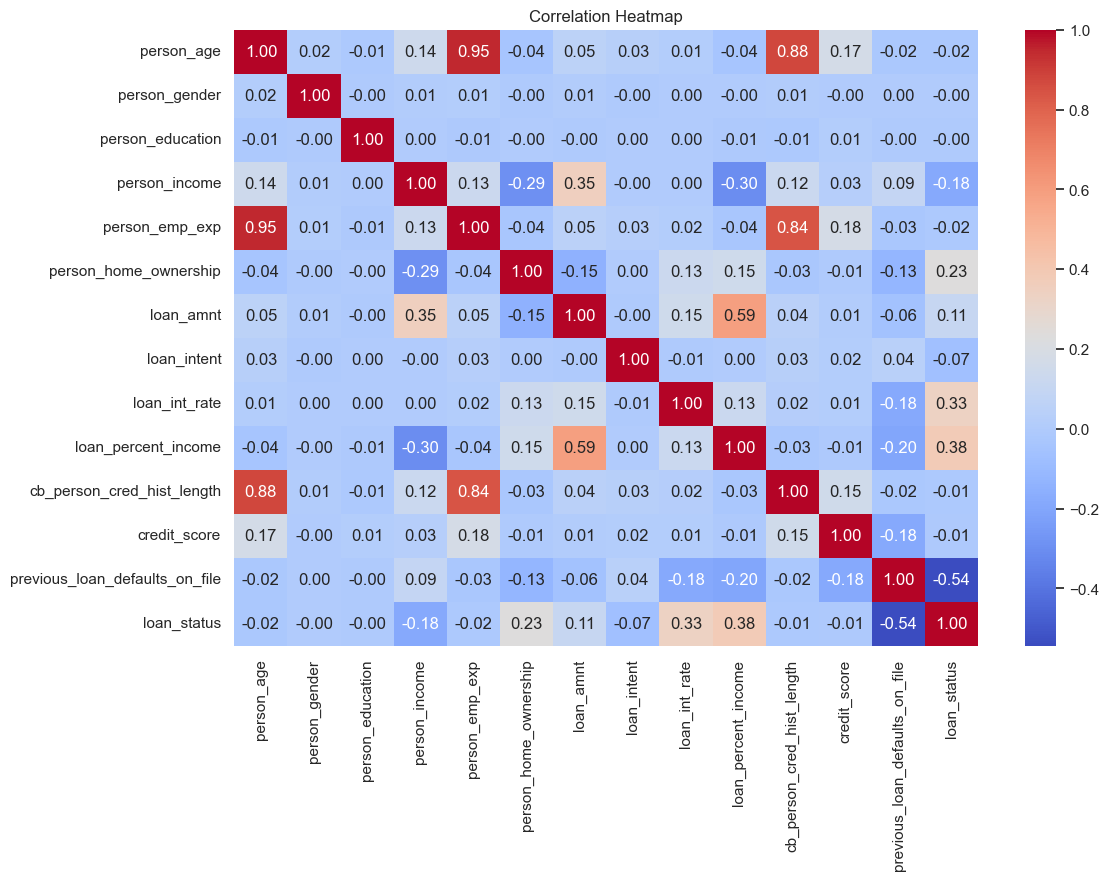

In [15]:
# Encode categorical columns
labelEncoder = LabelEncoder()
for col in cleaned_df.columns:
    if cleaned_df[col].dtype == 'object':
        cleaned_df[col] = labelEncoder.fit_transform(cleaned_df[col])

# Compute correlation matrix for numeric columns only
corr_matrix = cleaned_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Looking at the correlation plot, we can see that previoius loan defaults has a negative correlation with loan status. This makes sense because if you fail to fullfil the requirements of the loan you are less likely to get a loan in the future. Other parameters such as credit_score, person_age or person_emp_exp have much lower correlations with loan status, suggesting that there are more important things to consider when it comes to getting a loan appliction approved.

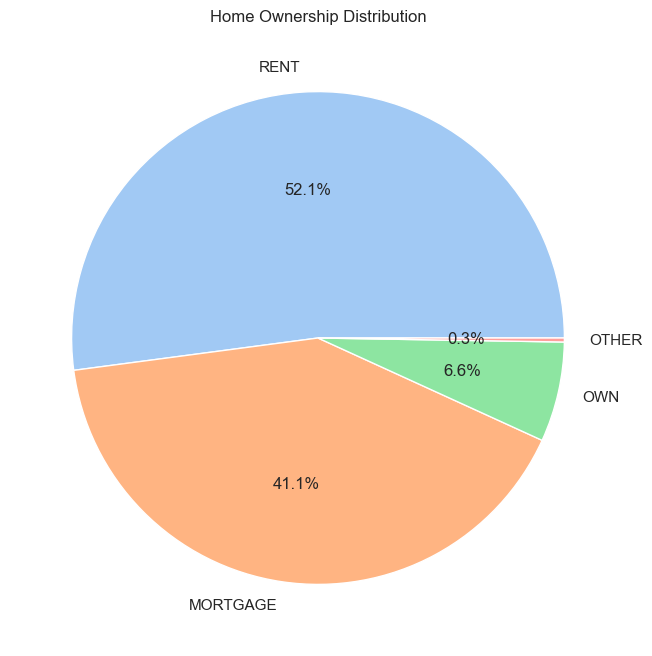

In [16]:
plt.figure(figsize=(8, 8))
data['person_home_ownership'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Home Ownership Distribution')
plt.ylabel('')
plt.show()

From this pie plot we can see that not many people own their houses outright, they either have a mortgage or they rent out a place.

C:\Users\mesha\AppData\Local\Temp\ipykernel_85524\2600625319.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='person_home_ownership', y='loan_amnt', data=cleaned_df, palette='Set3')


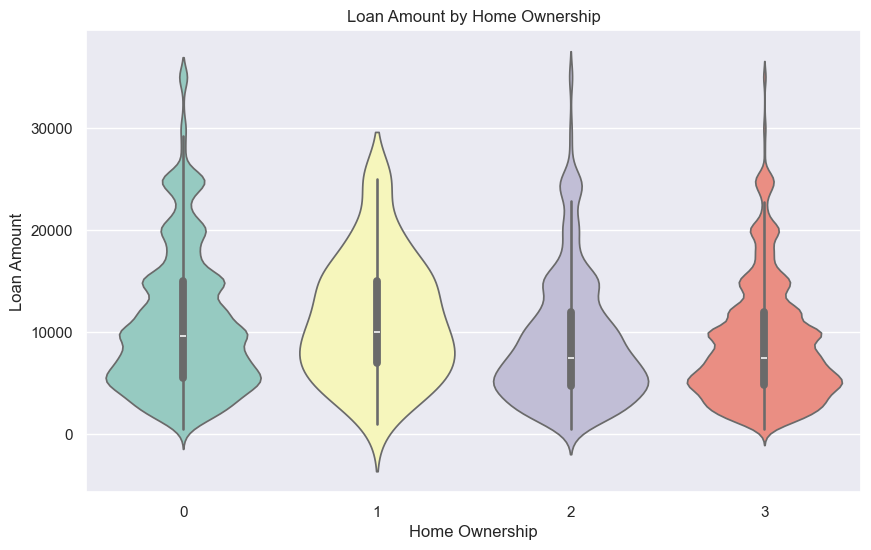

In [17]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='person_home_ownership', y='loan_amnt', data=cleaned_df, palette='Set3')
plt.title('Loan Amount by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Loan Amount')
plt.show()

0: renting
1: Homeownership with a mortgage
2: Full homeownerhsip (no mortgage)
3: Other
The violin plot indicates that the density of loans to won a house are most common at a little under $10,000. In addition it looks like category 0,2,3 have a significatly higher range than category 1.

#### Encoding Variables

Since the dataset has some Categorical variables, they had to be encoded so that they can be used in the models we used for this project.

In [18]:
for col in cleaned_df.columns:
    if cleaned_df[col].dtype == 'object':
        cleaned_df[col] = labelEncoder.fit_transform(cleaned_df[col])

In [19]:
cleaned_df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1


### Variable Selection

We decided to divide our data into variables and the target variable before selecting the models for our project since they were going to be the same for all the models chosen

In [20]:
X = cleaned_df.drop(columns=['loan_status'])
y = cleaned_df['loan_status']

display(X.head())

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0


### Decision-Tree Model

The first model chosen was the Decision-Tree model to predict whether or not a person would be approved for loan or not. We then calculated the accuracy of the model for multiple depths to determine the best depth for best results and to minimize overfitting. We also explored the importance of each feature in the model

#### Train-Test Split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

decisionTree = DecisionTreeClassifier(random_state=42)

decisionTree.fit(X_train, y_train)
y_pred = decisionTree.predict(X_test)

training_accuracy = decisionTree.score(X_train, y_train)
test_accuracy = accuracy_score(y_test, y_pred)

print("Training Accuracy: ", training_accuracy)
print("Test Accuracy: ", test_accuracy)

Training Accuracy:  1.0
Test Accuracy:  0.899121343565788


With such a Difference between the Train and Test Accuracy, I believe the model is overfitting to the data provided. A good way to determine the approximate best depth for the tree is by comparing the training accuracy and the testing accuracy for various depths which is done below.

#### Training and Testing Accuracy for Different Depths

In [22]:
depth, training, testing = [], [], []

for i in range(1, 30):
    decisionTree = DecisionTreeClassifier(max_depth=i, random_state=42)
    decisionTree.fit(X_train, y_train)
    training.append(decisionTree.score(X_train, y_train))
    testing.append(decisionTree.score(X_test, y_test))
    depth.append(i)
    
decisionTreeDF = pd.DataFrame({"Depth": depth, "Training Accuracy": training, "Testing Accuracy": testing})

decisionTreeDF

,Depth,Training Accuracy,Testing Accuracy
0,1,0.777475,0.778111
1,2,0.850890,0.853520
2,3,0.896079,0.892559
3,4,0.909733,0.905239
4,5,0.914321,0.912357
5,6,0.918437,0.912246
6,7,0.920245,0.913914
7,8,0.923554,0.914804
8,9,0.927419,0.914804
9,10,0.931257,0.914692


In the cell above, we chose to compute the accuracy score for the train and test data as the depth of the tree increases, we see that in the graph below, as we increase the depth of the tree, our training score increases continually as it becomes overfitted to the training data. This claim is backed up as the performance of the model on test data decreases as depth increases.

#### Plotting Testing and Training Accuracy for Different Depths

Text(0, 0.5, 'Accuracy Score')

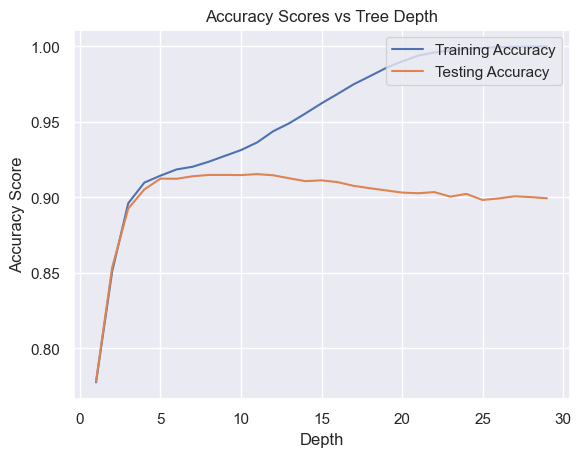

In [23]:
plt.plot(decisionTreeDF['Depth'], decisionTreeDF['Training Accuracy'], label='Training Accuracy')
plt.plot(decisionTreeDF['Depth'], decisionTreeDF['Testing Accuracy'], label='Testing Accuracy')
plt.legend(loc='upper right')
plt.title("Accuracy Scores vs Tree Depth")
plt.xlabel("Depth")
plt.ylabel("Accuracy Score")

Based on the Graph Above, we can assume that the Optimal Model Depth must be somewhere between 5-10. We used Gridsearch to help us determine the Correct Depth, using a 5 Cross-Validation Parameter.

#### Determining Best Depth

In [24]:
parameters = {"max_depth": range(1,30)}
grid_search = GridSearchCV(DecisionTreeClassifier(),parameters,cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_depth = grid_search.best_params_

print("The best depth for the model: "+ str(best_depth['max_depth']))

The best depth for the model: 8


#### Testing and Training Accuracy for Best Depth

In [25]:
decisionTree = DecisionTreeClassifier(max_depth=best_depth['max_depth'], random_state=42)

decisionTree.fit(X_train, y_train)
y_pred = decisionTree.predict(X_test)

training_accuracy = decisionTree.score(X_train, y_train)
test_accuracy = accuracy_score(y_test, y_pred)

print("Training Accuracy: ", training_accuracy)
print("Test Accuracy: ", test_accuracy)

Training Accuracy:  0.9235539488320356
Test Accuracy:  0.9148036925814703


These outputs are Better and show that the Model is not overfitting to the data anymore.

#### Confusion Matrix

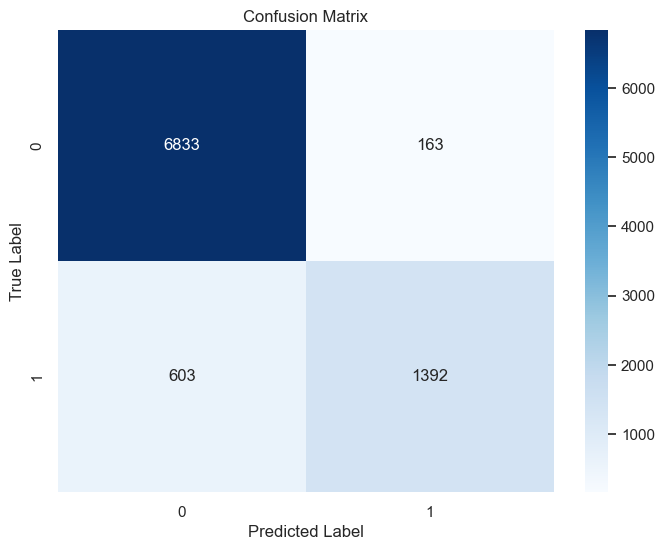

In [26]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [27]:
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
TN = cm[0,0]

FPR = FP / (FP + TN) # False Positive Rate
FNR = FN / (TP + FN) # False Negative Rate

print("False Positive Rate (FPR): ", FPR)
print("False Negative Rate (FNR): ", FNR)

False Positive Rate (FPR):  0.02329902801600915
False Negative Rate (FNR):  0.3022556390977444


Out of all the Applicants who should NOT be approved for a loan (i.e., actual negatives), about 2.33% were wrongly predicted as approved by the Model. This model is rarely approving risky applicants, which is good for minimizing financial loss due to defaults. 

Out of all the Applicants who should be approved (i.e., actual positives), about 30.23% were wrongly predicted as denied. Our model is frequently denying creditworthy applicants, which could mean lost business or unhappy customers.

### Feature Importance

In [28]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': decisionTree.feature_importances_
})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False).reset_index(drop=True)

feature_importance

,Feature,Importance
0,previous_loan_defaults_on_file,0.431734
1,loan_percent_income,0.192772
2,loan_int_rate,0.187416
3,person_income,0.086011
4,person_home_ownership,0.055779
5,loan_intent,0.025961
6,credit_score,0.017420
7,cb_person_cred_hist_length,0.001233
8,loan_amnt,0.000862
9,person_emp_exp,0.000386


For our Decision Tree, the feature Previous_Loan_Defaults_On_File was the strongest predictor for if a person was approved for loan or not. The next most important feature was Loan_Percent_Income. These results are not too surprising, as we saw above in the EDA portion with the correlation matrix, Previous_Loan_Defaults_On_File and Loan_Percent_Income had the strongest correlation with our Loan_Status column.

### Logistic Regression

Any features with positive coefficients increase the liklohood of the positive class(loan gets approved). In contrast any negative coefficients leads to the increaser of the linklihood of the negative class(loan fails to get approved). In addition there are a lof of features that have coefficients closer to 0. These features we can elimninate since they have little impact on the overall model.

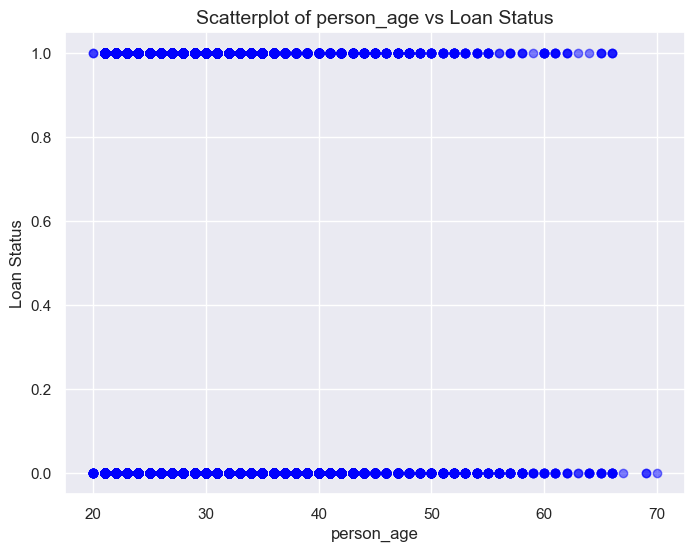

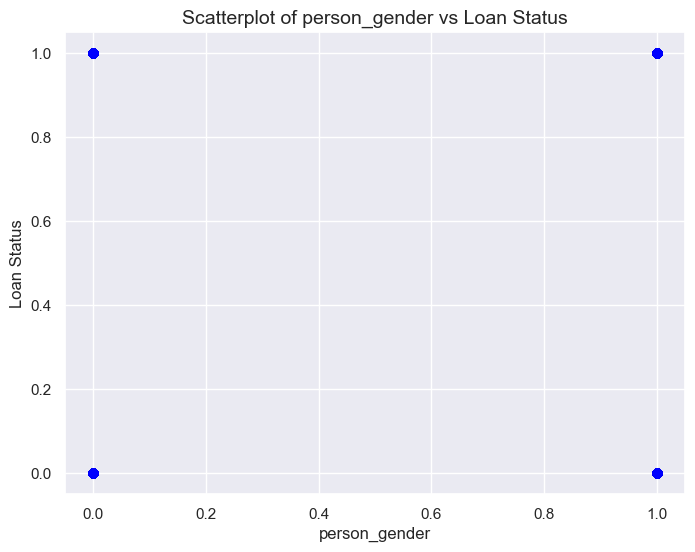

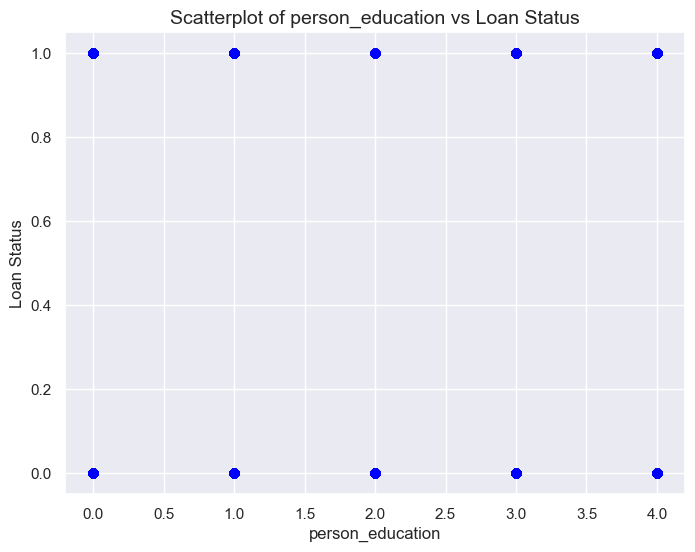

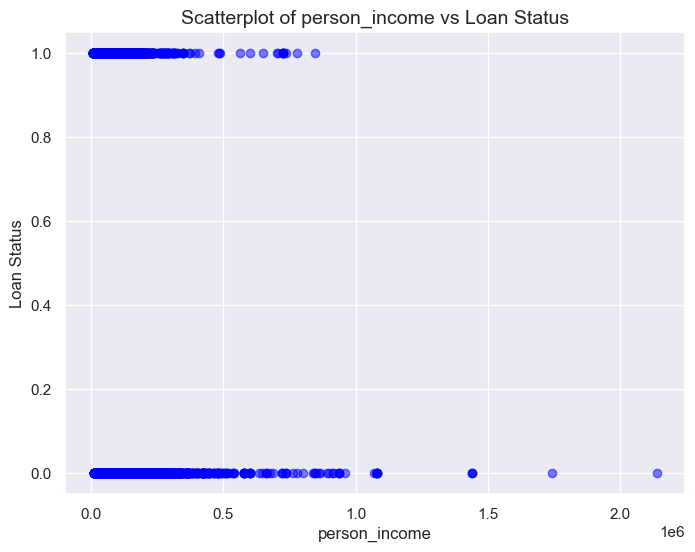

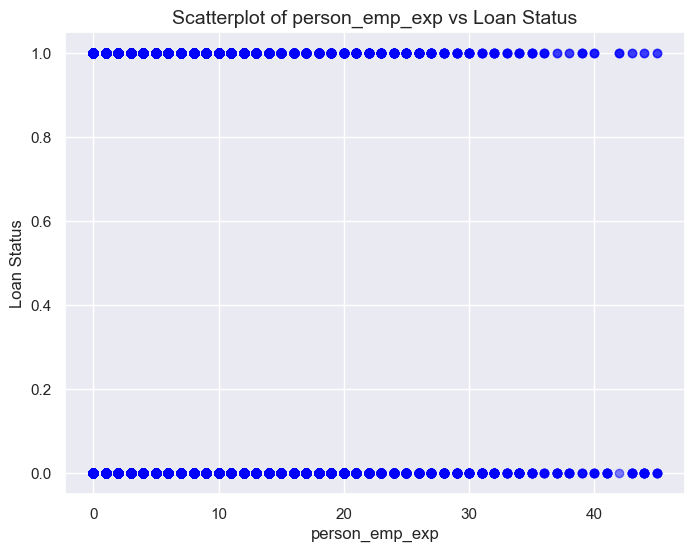

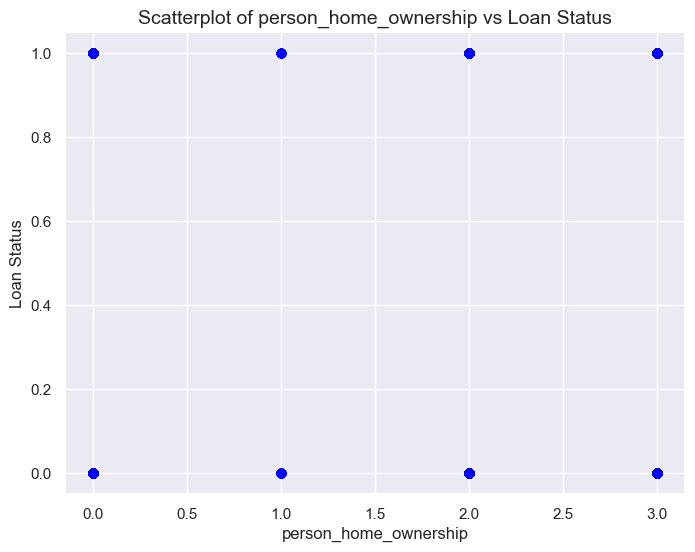

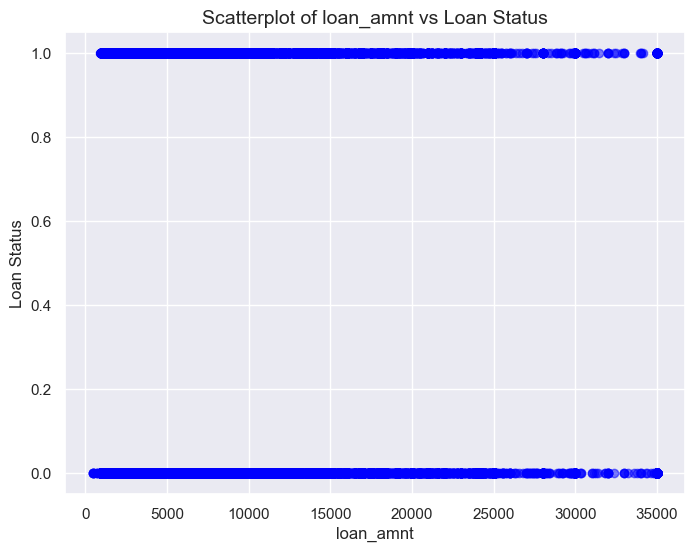

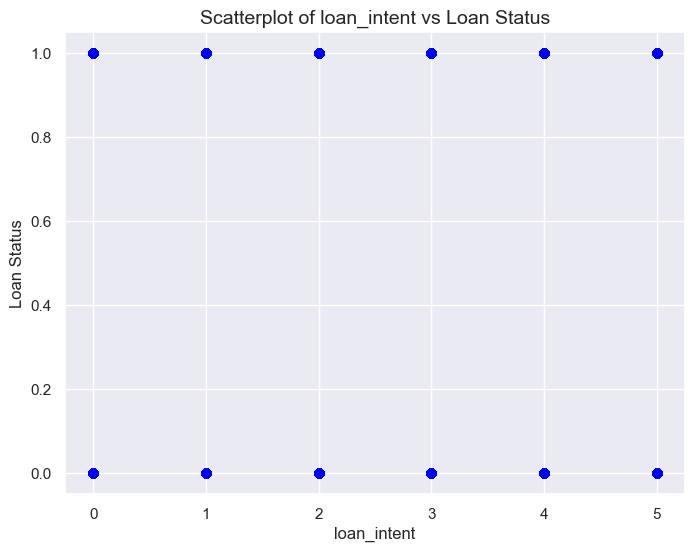

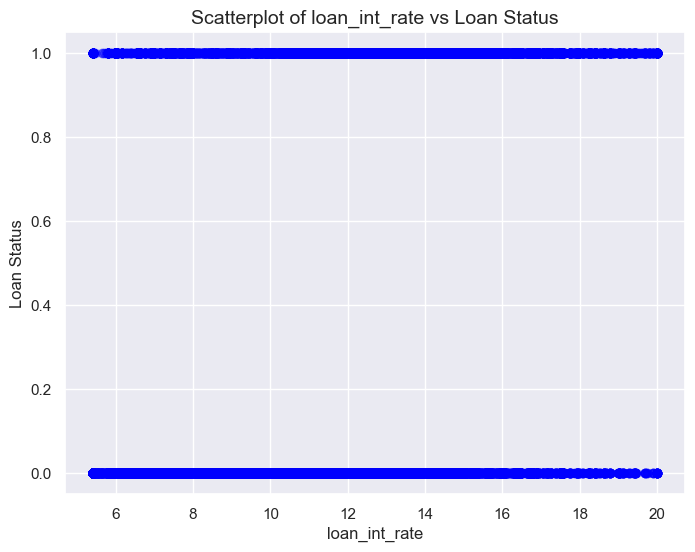

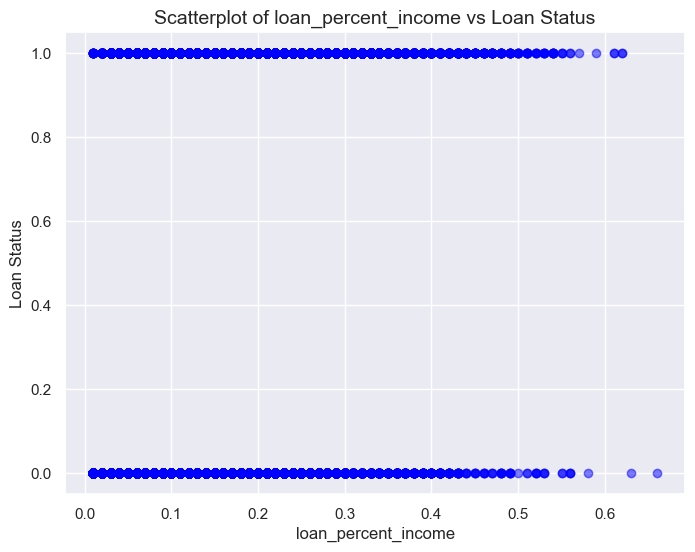

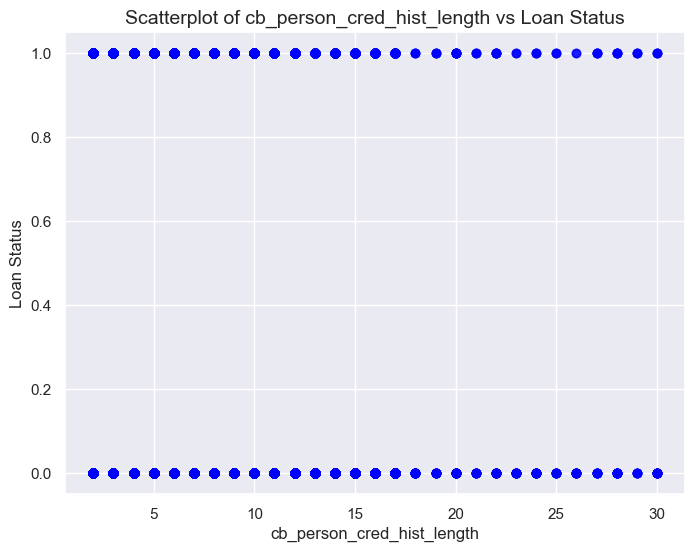

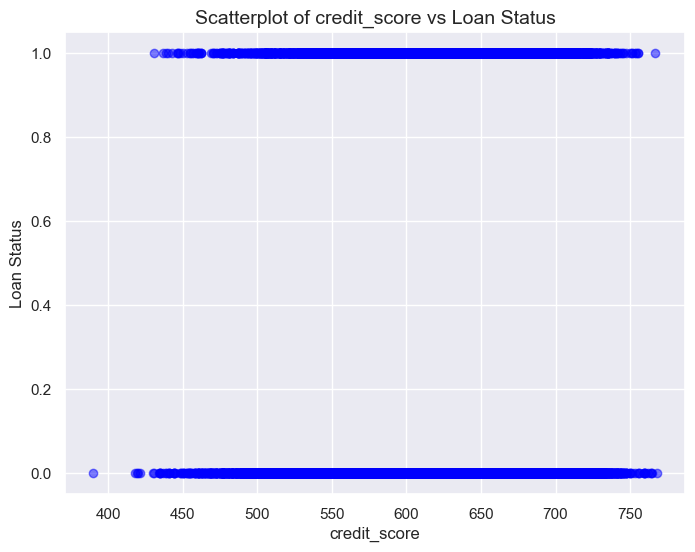

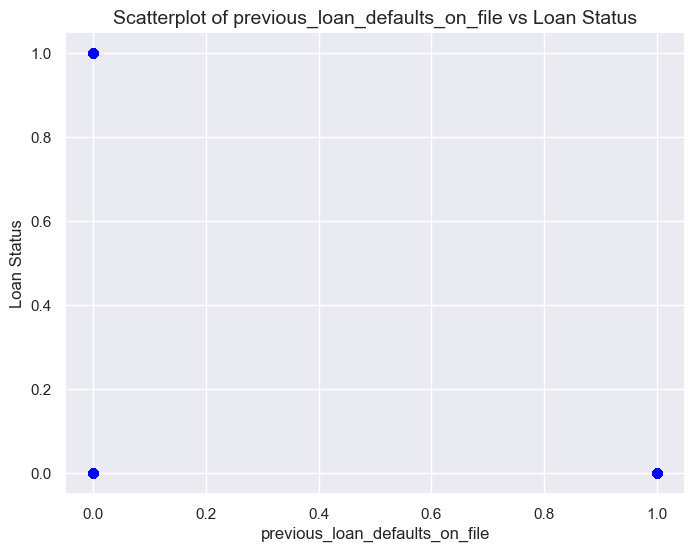

In [29]:
# Loop through all columns in the feature set
for column in X.columns:
    plt.figure(figsize=(8, 6))  # Set figure size for better visualization
    plt.scatter(X[column], y, alpha=0.5, color='blue')
    plt.title(f'Scatterplot of {column} vs Loan Status', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Loan Status', fontsize=12)
    plt.grid(True)  # Optional: Add grid lines for readability
    plt.show()


These scatterplots show us that the relationships between our predictors and loan status are nonlinear. This may affect the performance of the linear regression model.

#### Regularization

In [30]:
log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, max_iter=1000, random_state=42)  # C controls regularization strength
log_reg_l1.fit(X_train, y_train)

# Predictions
y_pred = log_reg_l1.predict(X_test)
# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')


Accuracy: 0.8950


Regularization is used in order to eliminate any of the parameters which have a significance closer to 0.

### Feature Importance

In [31]:
# Extract coefficients and feature names
coefficients = log_reg_l1.coef_.flatten()
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
    'Importance': np.abs(coefficients)  # Absolute value to assess magnitude
})

# Sort by absolute importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance)

Feature Importance:
                           Feature  Coefficient  Importance
9              loan_percent_income    15.405139   15.405139
12  previous_loan_defaults_on_file    -9.912841    9.912841
8                    loan_int_rate     0.331875    0.331875
5            person_home_ownership     0.242425    0.242425
7                      loan_intent    -0.153963    0.153963
0                       person_age     0.036196    0.036196
1                    person_gender     0.036004    0.036004
4                   person_emp_exp    -0.026223    0.026223
10      cb_person_cred_hist_length    -0.012204    0.012204
11                    credit_score    -0.008572    0.008572
2                 person_education    -0.004570    0.004570
6                        loan_amnt    -0.000103    0.000103
3                    person_income     0.000002    0.000002


Any features with positive coefficients increase the liklohood of the positive class(loan gets approved). In contrast any negative coefficients leads to the increaser of the linklihood of the negative class(loan fails to get approved). In addition there are a lof of features that have coefficients closer to 0. These features we can elimninate since they have little impact on the overall model.

#### Confusion Matrix

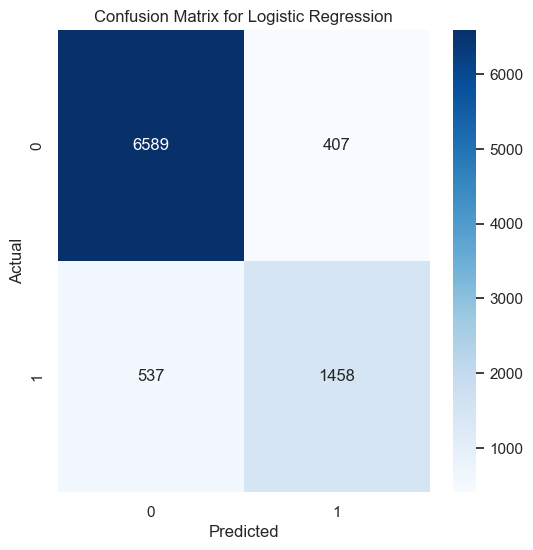

In [32]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

True negatives(6589): The number of cases where the loan is not approved(class 0) and the model correctly predicts class 0.

True Positives(1458): The number of cases where the loan is approved(class 1) and the model correctly predicts class 1.

False Negative(537): The number of casses where the loan was actually approved(class 1) but the model incorrectly predicts class 0.

False Positive(407): The number of casses where the loan was actually not approved(class 0) but the model incorrectly predicts class 1.

Overall The model has a good ability to avoid approving loans incorrectly but it does a worse job classifying where the loan applications are rejected.

#### ROC-AUC Curve

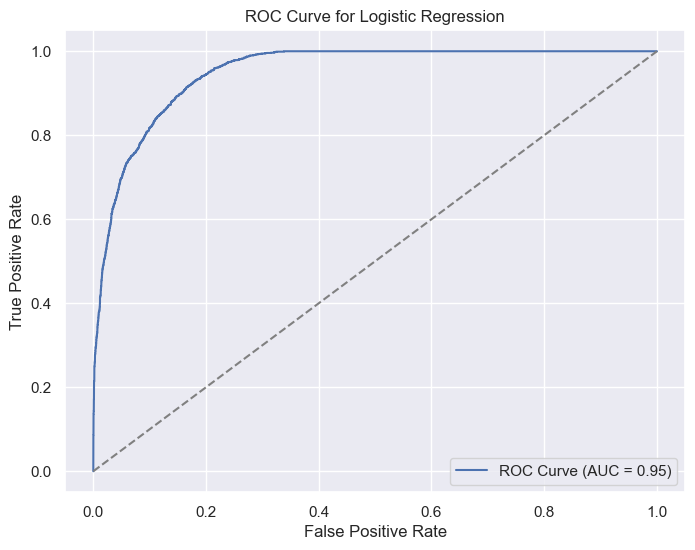

In [33]:
# ROC-AUC
y_prob = log_reg_l1.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

As we can see the ROC Curve for the logistic regression model performed ver well with an Area Under the Curve (AUC) score of 0.94. This suggests that the model does an excellent job at distinguishing between the positive (approved loans) and negative (not approved loans) classes. In addition a high AUC means that the model neither overfitted or underfitted. 

Recall: TP/TP+FN = 1458/(1458+537) = 0.73. A recall of 0.73 indicates that the model correctly identified cases where the loan was accepted 73% of the time.

FPR: FP/FP+TN = 407/(407+6589) = 0.058. A False Positive Rate of 0.058 indicates that the model the model misclassified 5.8% of loan approval cases.

#### Model Performance

In [34]:
# Training predictions
y_train_pred = log_reg_l1.predict(X_train)

# Testing predictions
y_test_pred = log_reg_l1.predict(X_test)

# Calculate train and test accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Train Accuracy: 0.8905
Test Accuracy: 0.8950


As we can see the model performed similarly to both the test and train data. This shows that the logistic regression model used is neither overfitted or underfitted.

### Logistic Regression with Threshold

Accuracy (with threshold 0.5): 0.8950


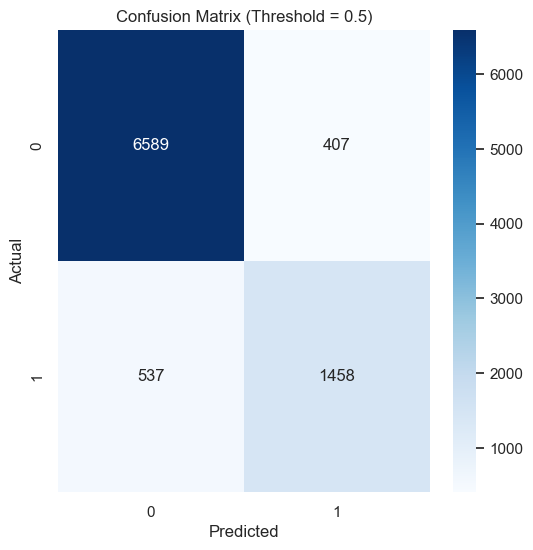

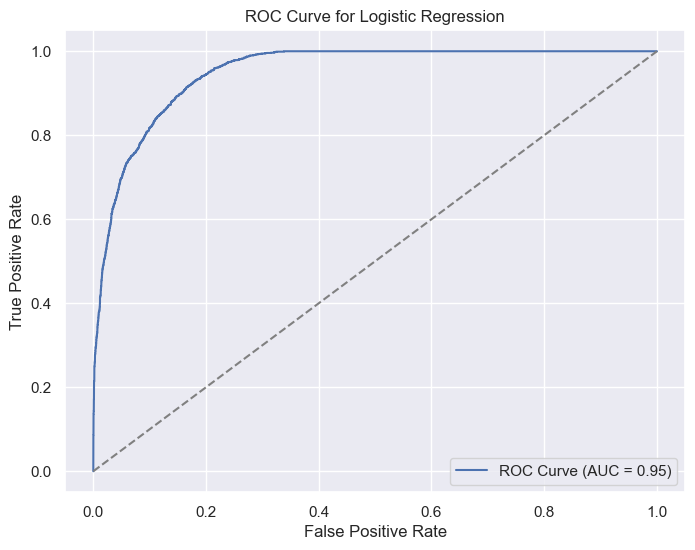

In [35]:
# Get predicted probabilities for the positive class
y_prob = log_reg_l1.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (positive class)

# Set a custom threshold
threshold = 0.5  # Adjust this threshold as needed
y_pred_threshold = (y_prob >= threshold).astype(int)

# Evaluate the model with the new threshold
print(f'Accuracy (with threshold {threshold}): {accuracy_score(y_test, y_pred_threshold):.4f}')

# Confusion matrix
cm_threshold = confusion_matrix(y_test, y_pred_threshold)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_threshold, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix (Threshold = {threshold})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC-AUC remains the same as it evaluates the model across all thresholds
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


We can see that the ROC Curve is slightly smoother when applying a threshold of 0.5 meaning that the data is slightly more balanced. 

In conclusion the Decision Tree model performed better than the logistic regression model. This might be because Decision Tree is much more flexible than logistic regression. It can analyze much more complex relationships than the logistic regression model can.